In [1]:
import json
import requests
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import seaborn as sns
import numpy as np
from scipy import stats

import sys
sys.setrecursionlimit(10000)

In [2]:
request_1 = requests.get("https://data.cityofchicago.org/resource/s6ha-ppgi.json")

request_1.status_code

200

In [3]:
with request_1 as f:
    raw_1 = f.json()

In [4]:
affordable_df = pd.DataFrame(raw_1)

In [5]:
neighborhood_zip = pd.DataFrame(zip(affordable_df['community_area'], affordable_df['zip_code']))

In [6]:
neighborhood_zip.rename(columns={0:'neighborhood', 1:'zip'}, inplace=True)

In [7]:
neighborhood_zip

,neighborhood,zip
0,Portage Park,60641
1,West Englewood,60636
2,Englewood,60621
3,Washington Park,60637
4,Humboldt Park,60624
...,...,...
423,Near North Side,60622
424,Near South Side,60616
425,Washington Park,60637
426,Near West Side,60608


In [5]:
request_2 = requests.get('https://data.cityofchicago.org/resource/dw27-rash.json')

with request_2 as b:
    raw_2 = b.json()

progress_df = pd.DataFrame(raw_2)

In [6]:
hs_df = progress_df[progress_df['primary_category'] == 'HS']

In [9]:
hs_df['student_attainment_description'].value_counts()

Student Attainment measures how well the school performed on standardized tests at a single point in time. This school's score is based on attainment relative to the combined College Readiness Benchmark scores, set by College Board. To learn more, visit  https://collegereadiness.collegeboard.org .    172
Name: student_attainment_description, dtype: int64

In [10]:
hs_df['student_growth_rating'].value_counts()

AVERAGE              81
NO DATA AVAILABLE    36
BELOW AVERAGE        33
ABOVE AVERAGE        19
FAR ABOVE AVERAGE     3
Name: student_growth_rating, dtype: int64

In [11]:
hs_df2 = pd.DataFrame(zip(hs_df['school_id'],hs_df['zip'],hs_df['student_growth_rating'],hs_df['school_type']))

In [12]:
hs_df2

,0,1,2,3
0,609734,60631,AVERAGE,Neighborhood
1,610386,60609,NO DATA AVAILABLE,Citywide-Option
2,400113,60610,AVERAGE,Charter
3,610391,60636,AVERAGE,Selective enrollment
4,400141,60640,NO DATA AVAILABLE,Charter
...,...,...,...,...
171,400053,60642,ABOVE AVERAGE,Charter
172,400156,60628,ABOVE AVERAGE,Charter
173,400098,60602,ABOVE AVERAGE,Charter
174,610323,60617,BELOW AVERAGE,Small


In [13]:
hs_df2.rename(columns={0:'school_id',1:'zip',2:'student_growth',3:'school_type'}, inplace=True)

In [14]:
hs_df2.dropna(inplace=True)

In [15]:
hs_df2.shape

(172, 4)

In [16]:
first_merge = hs_df2.merge(neighborhood_zip,how='inner',on='zip')

In [17]:
first_merge

,school_id,zip,student_growth,school_type,neighborhood
0,609734,60631,AVERAGE,Neighborhood,Norwood Park
1,610569,60631,BELOW AVERAGE,Citywide-Option,Norwood Park
2,610386,60609,NO DATA AVAILABLE,Citywide-Option,Grand Boulevard
3,610386,60609,NO DATA AVAILABLE,Citywide-Option,New City
4,610386,60609,NO DATA AVAILABLE,Citywide-Option,Douglas
...,...,...,...,...,...
1886,609730,60660,AVERAGE,Neighborhood,Edgewater
1887,609730,60660,AVERAGE,Neighborhood,Edgewater
1888,609730,60660,AVERAGE,Neighborhood,Edgewater
1889,609730,60660,AVERAGE,Neighborhood,Edgewater


In [18]:
request_5 = requests.get('https://data.cityofchicago.org/resource/kn9c-c2s2.json')

with request_5 as g:
    raw_5 = g.json()
    
socio_eco_df = pd.DataFrame(raw_5)

In [19]:
cleaned_se_df = pd.DataFrame(zip(socio_eco_df['community_area_name'],socio_eco_df['per_capita_income_'],socio_eco_df['hardship_index']))

In [20]:
cleaned_se_df.rename(columns={0:'neighborhood',1:'per_capita_income',2:'hardship_index'},inplace=True)

In [21]:
final_df = first_merge.merge(cleaned_se_df,how='left',on='neighborhood')

In [22]:
final_df

,school_id,zip,student_growth,school_type,neighborhood,per_capita_income,hardship_index
0,609734,60631,AVERAGE,Neighborhood,Norwood Park,32875,21
1,610569,60631,BELOW AVERAGE,Citywide-Option,Norwood Park,32875,21
2,610386,60609,NO DATA AVAILABLE,Citywide-Option,Grand Boulevard,23472,57
3,610386,60609,NO DATA AVAILABLE,Citywide-Option,New City,12765,91
4,610386,60609,NO DATA AVAILABLE,Citywide-Option,Douglas,23791,47
...,...,...,...,...,...,...,...
1886,609730,60660,AVERAGE,Neighborhood,Edgewater,33385,19
1887,609730,60660,AVERAGE,Neighborhood,Edgewater,33385,19
1888,609730,60660,AVERAGE,Neighborhood,Edgewater,33385,19
1889,609730,60660,AVERAGE,Neighborhood,Edgewater,33385,19


In [23]:
final_df.shape

(1891, 7)

In [24]:
final_df.dropna(inplace=True)

In [25]:
final_df[final_df['hardship_index']=='87'].drop_duplicates('school_id')

,school_id,zip,student_growth,school_type,neighborhood,per_capita_income,hardship_index
509,609748,60608,NO DATA AVAILABLE,Citywide-Option,North Lawndale,12034,87
544,400104,60608,AVERAGE,Charter,North Lawndale,12034,87
579,400135,60608,NO DATA AVAILABLE,Charter,North Lawndale,12034,87
614,609750,60608,NO DATA AVAILABLE,Citywide-Option,North Lawndale,12034,87
649,400091,60608,AVERAGE,Contract,North Lawndale,12034,87
684,400164,60608,NO DATA AVAILABLE,Charter,North Lawndale,12034,87
719,610402,60608,ABOVE AVERAGE,Magnet,North Lawndale,12034,87
754,609764,60608,BELOW AVERAGE,Neighborhood,North Lawndale,12034,87
789,400057,60608,FAR ABOVE AVERAGE,Charter,North Lawndale,12034,87
827,400143,60612,NO DATA AVAILABLE,Charter,North Lawndale,12034,87


In [26]:
len(final_df.school_id.unique())

168

In [27]:
final_df.drop_duplicates(subset='school_id',inplace=True)

In [28]:
final_df.per_capita_income = final_df.per_capita_income.astype(int)

In [29]:
final_df.student_growth.value_counts()

AVERAGE              79
NO DATA AVAILABLE    35
BELOW AVERAGE        33
ABOVE AVERAGE        18
FAR ABOVE AVERAGE     3
Name: student_growth, dtype: int64

In [30]:
final_df.groupby(['student_growth', 'school_type']).count()

school_id  zip  neighborhood  \
student_growth    school_type                                          
ABOVE AVERAGE     Charter                      14   14            14   
                  Citywide-Option               1    1             1   
                  Magnet                        2    2             2   
                  Small                         1    1             1   
AVERAGE           Career academy                2    2             2   
                  Charter                      21   21            21   
                  Citywide-Option               2    2             2   
                  Contract                      2    2             2   
                  Magnet                        3    3             3   
                  Military academy              5    5             5   
                  Neighborhood                 29   29            29   
                  Selective enrollment          9    9             9   
                  Small                         6    6             6   
BELOW AVERAGE     Career academy                2    2             2   
                  Charter                       5    5             5   
                  Citywide-Option               1    1             1   
                  Magnet                        1    1             1   
                  Neighborhood                 16   16            16   
                  Selective enrollment          2    2             2   
                  Small                         6    6             6   
FAR ABOVE AVERAGE Charter                       3    3             3   
NO DATA AVAILABLE Charter                      19   19            19   
                  Citywide-Option              12   12            12   
                  Special Education             4    4             4   

                                        per_capita_income  hardship_index  
student_growth    school_type                                              
ABOVE AVERAGE     Charter                              14              14  
                  Citywide-Option                       1               1  
                  Magnet                                2               2  
                  Small                                 1               1  
AVERAGE           Career academy                        2               2  
                  Charter                              21              21  
                  Citywide-Option                       2               2  
                  Contract                              2               2  
                  Magnet                                3               3  
                  Military academy                      5               5  
                  Neighborhood                         29              29  
                  Selective enrollment                  9               9  
                  Small                                 6               6  
BELOW AVERAGE     Career academy                        2               2  
                  Charter                               5               5  
                  Citywide-Option                       1               1  
                  Magnet                                1               1  
                  Neighborhood                         16              16  
                  Selective enrollment                  2               2  
                  Small                                 6               6  
FAR ABOVE AVERAGE Charter                               3               3  
NO DATA AVAILABLE Charter                              19              19  
                  Citywide-Option                      12              12  
                  Special Education                     4               4

In [31]:
final_df.loc[:,'student_growth']

0                 AVERAGE
1           BELOW AVERAGE
2       NO DATA AVAILABLE
19          BELOW AVERAGE
36                AVERAGE
              ...        
1839              AVERAGE
1842              AVERAGE
1845              AVERAGE
1884              AVERAGE
1885              AVERAGE
Name: student_growth, Length: 168, dtype: object

In [32]:
final_df = final_df[final_df.student_growth != 'NO DATA AVAILABLE']

In [33]:
for i in final_df.student_growth:
    if i == 'FAR ABOVE AVERAGE':
        final_df.student_growth.replace('FAR ABOVE AVERAGE', 4, inplace=True)
    elif i == 'ABOVE AVERAGE':
        final_df.student_growth.replace('ABOVE AVERAGE', 3, inplace=True)
    elif i == 'AVERAGE':
        final_df.student_growth.replace('AVERAGE', 2, inplace=True)
    elif i == 'BELOW AVERAGE':
        final_df.student_growth.replace('BELOW AVERAGE', 1, inplace=True)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [34]:
final_df.student_growth.value_counts()

2    79
1    33
3    18
4     3
Name: student_growth, dtype: int64

In [35]:
final_df_categorical = final_df.copy()

In [36]:
final_df

,school_id,zip,student_growth,school_type,neighborhood,per_capita_income,hardship_index
0,609734,60631,2,Neighborhood,Norwood Park,32875,21
1,610569,60631,1,Citywide-Option,Norwood Park,32875,21
19,609735,60609,1,Neighborhood,Grand Boulevard,23472,57
36,610513,60609,2,Military academy,Grand Boulevard,23472,57
53,609682,60609,1,Neighborhood,Grand Boulevard,23472,57
...,...,...,...,...,...,...,...
1839,609749,60625,2,Selective enrollment,Lincoln Square,37524,17
1842,609728,60625,2,Neighborhood,Lincoln Square,37524,17
1845,609780,60647,2,Military academy,Logan Square,31908,23
1884,609678,60605,2,Selective enrollment,Near South Side,59077,7


In [37]:
final_df_categorical

,school_id,zip,student_growth,school_type,neighborhood,per_capita_income,hardship_index
0,609734,60631,2,Neighborhood,Norwood Park,32875,21
1,610569,60631,1,Citywide-Option,Norwood Park,32875,21
19,609735,60609,1,Neighborhood,Grand Boulevard,23472,57
36,610513,60609,2,Military academy,Grand Boulevard,23472,57
53,609682,60609,1,Neighborhood,Grand Boulevard,23472,57
...,...,...,...,...,...,...,...
1839,609749,60625,2,Selective enrollment,Lincoln Square,37524,17
1842,609728,60625,2,Neighborhood,Lincoln Square,37524,17
1845,609780,60647,2,Military academy,Logan Square,31908,23
1884,609678,60605,2,Selective enrollment,Near South Side,59077,7


In [38]:
final_df_categorical.hardship_index = final_df_categorical.hardship_index.astype(int)

In [39]:
for i in final_df_categorical.hardship_index:
    if 25 >= i > 0:
        final_df_categorical.hardship_index.replace(i, '75th+', inplace=True)
    elif 50 >= i > 25:
        final_df_categorical.hardship_index.replace(i, '50th+', inplace=True)
    elif 75 >= i > 50:
        final_df_categorical.hardship_index.replace(i, '25th+', inplace=True)
    else: 
        final_df_categorical.hardship_index.replace(i, '0th+', inplace=True)

final_df_categorical

,school_id,zip,student_growth,school_type,neighborhood,per_capita_income,hardship_index
0,609734,60631,2,Neighborhood,Norwood Park,32875,75th+
1,610569,60631,1,Citywide-Option,Norwood Park,32875,75th+
19,609735,60609,1,Neighborhood,Grand Boulevard,23472,25th+
36,610513,60609,2,Military academy,Grand Boulevard,23472,25th+
53,609682,60609,1,Neighborhood,Grand Boulevard,23472,25th+
...,...,...,...,...,...,...,...
1839,609749,60625,2,Selective enrollment,Lincoln Square,37524,75th+
1842,609728,60625,2,Neighborhood,Lincoln Square,37524,75th+
1845,609780,60647,2,Military academy,Logan Square,31908,75th+
1884,609678,60605,2,Selective enrollment,Near South Side,59077,75th+


In [40]:
final_df_categorical.hardship_index.unique

<bound method Series.unique of 0       75th+
1       75th+
19      25th+
36      25th+
53      25th+
        ...  
1839    75th+
1842    75th+
1845    75th+
1884    75th+
1885    75th+
Name: hardship_index, Length: 133, dtype: object>

In [56]:
def one_sample_ttest(sample, popmean, alpha):

    sns.set(color_codes=True)
    sns.set(rc={'figure.figsize':(16,8)})
    sns.distplot(sample)
    
    mu = popmean
    
    x_bar = sample.mean()

    sigma = np.std(sample)
    
    df = len(sample) - 1
    
    t_crit = stats.t.ppf(1 - alpha, df=df)
    
    results = stats.ttest_1samp(a= sample, popmean= mu)         
    
    if (results[0]>t_crit) and (results[1]<alpha):
        print ("Null hypothesis rejected. Results are statistically significant with t-value =", 
                round(results[0], 2), "critical t-value =", t_crit, "and p-value =", np.round((results[1]), 10))
    else:
        print ("Null hypothesis is True with t-value =", 
                round(results[0], 2), ", critical t-value =", t_crit, "and p-value =", np.round((results[1]), 10))

# 1. Mew = student_growth 2. Sample = student_growth of top 50 neighborhood according to hardship index 3. sigma = std(sample) 4. df = len(sample) -1

In [42]:
df_1 = final_df.copy()

In [43]:
df_1.hardship_index = df_1.hardship_index.astype(int)

In [44]:
df_1

,school_id,zip,student_growth,school_type,neighborhood,per_capita_income,hardship_index
0,609734,60631,2,Neighborhood,Norwood Park,32875,21
1,610569,60631,1,Citywide-Option,Norwood Park,32875,21
19,609735,60609,1,Neighborhood,Grand Boulevard,23472,57
36,610513,60609,2,Military academy,Grand Boulevard,23472,57
53,609682,60609,1,Neighborhood,Grand Boulevard,23472,57
...,...,...,...,...,...,...,...
1839,609749,60625,2,Selective enrollment,Lincoln Square,37524,17
1842,609728,60625,2,Neighborhood,Lincoln Square,37524,17
1845,609780,60647,2,Military academy,Logan Square,31908,23
1884,609678,60605,2,Selective enrollment,Near South Side,59077,7


In [45]:
subset_df = df_1[df_1.hardship_index < 10]

In [46]:
subset_df

,school_id,zip,student_growth,school_type,neighborhood,per_capita_income,hardship_index
87,400113,60610,2,Charter,Near North Side,88669,1
92,609680,60610,2,Selective enrollment,Near North Side,88669,1
97,400170,60610,3,Charter,Near North Side,88669,1
168,609676,60616,1,Career academy,Near South Side,59077,7
184,400105,60616,2,Charter,Near South Side,59077,7
192,400064,60616,2,Charter,Near South Side,59077,7
1317,610529,60642,2,Neighborhood,Near North Side,88669,1
1318,400051,60642,4,Charter,Near North Side,88669,1
1319,400055,60642,3,Charter,Near North Side,88669,1
1320,400053,60642,3,Charter,Near North Side,88669,1


In [47]:
df_1.student_growth.value_counts()

2    79
1    33
3    18
4     3
Name: student_growth, dtype: int64

Null hypothesis is True with t-value = 1.78 , critical t-value = 1.7958848187036691 and p-value = 0.10194067


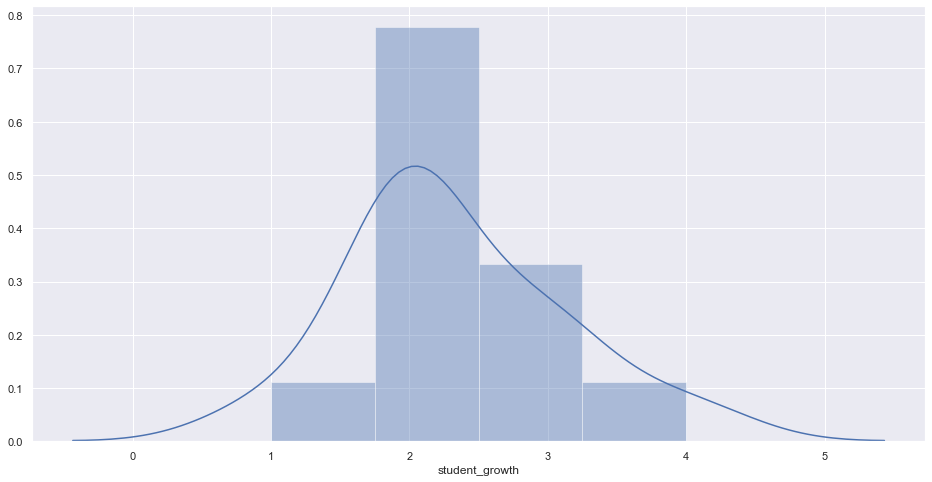

In [57]:
one_sample_ttest(subset_df.student_growth,df_1.student_growth.mean(),.05)


In [49]:
not_subset_df = df_1[df_1['hardship_index'] >= 30]

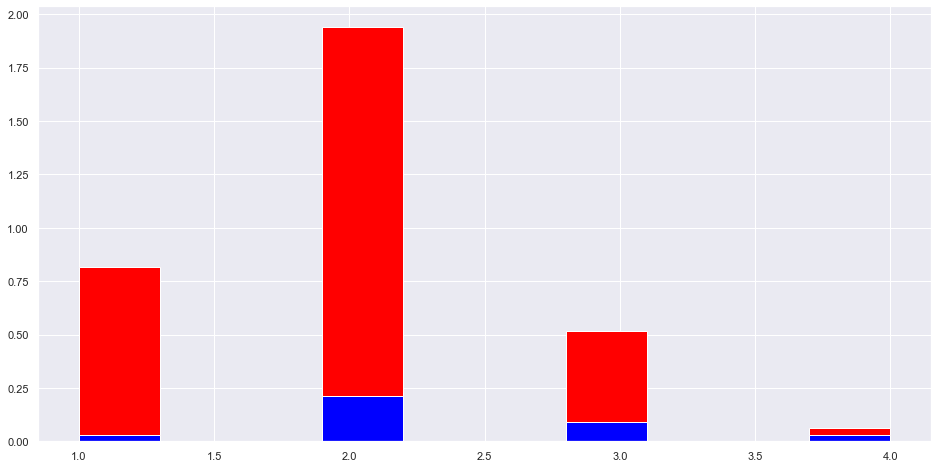

In [58]:
plt.figure()
plt.hist([subset_df.student_growth,not_subset_df.student_growth], stacked=True, density=True, color=["blue", "red"])
plt.show()

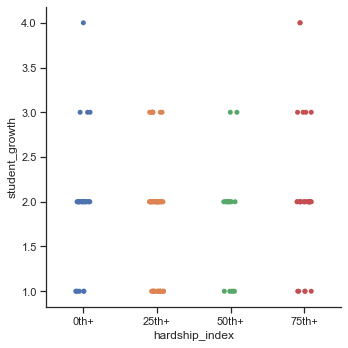

In [51]:
sns.set(style="ticks")
g = sns.catplot(x='hardship_index', y='student_growth', data=final_df_categorical, order=['0th+', '25th+','50th+','75th+'])

In [52]:
charter_df = final_df[final_df['school_type'] == 'Charter']

In [53]:
charter_df

,school_id,zip,student_growth,school_type,neighborhood,per_capita_income,hardship_index
87,400113,60610,2,Charter,Near North Side,88669,1
97,400170,60610,3,Charter,Near North Side,88669,1
184,400105,60616,2,Charter,Near South Side,59077,7
192,400064,60616,2,Charter,Near South Side,59077,7
208,400035,60626,2,Charter,Rogers Park,23939,39
233,400032,60620,1,Charter,Auburn Gresham,15528,74
241,400061,60620,2,Charter,Auburn Gresham,15528,74
249,400062,60620,2,Charter,Auburn Gresham,15528,74
257,400117,60620,3,Charter,Auburn Gresham,15528,74
274,400162,60641,3,Charter,Portage Park,24336,35


In [54]:
final_df.loc[:,'student_growth'] = final_df.student_growth.astype(int)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Null hypothesis rejected. Results are statistically significant with t-value = 3.49 critical t-value = 1.6819523559426 and p-value = 0.0011588387


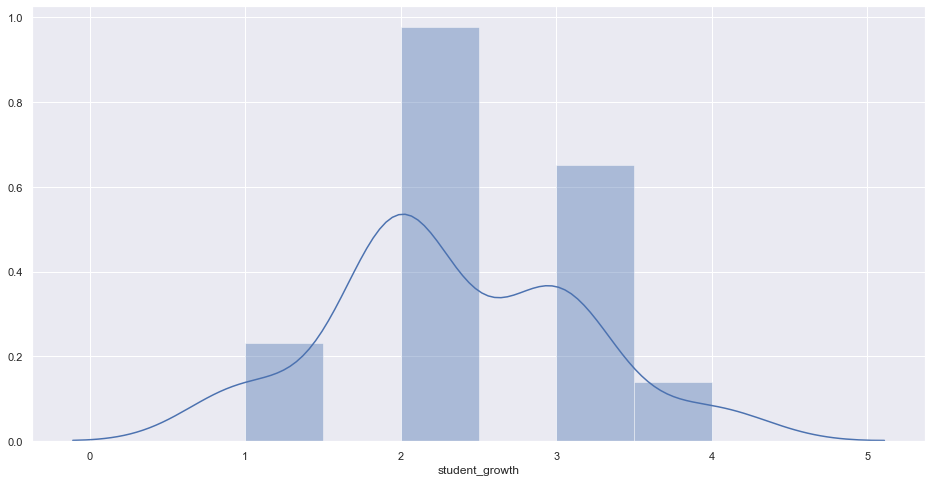

In [59]:
one_sample_ttest(charter_df.student_growth, final_df.student_growth.mean(), 0.05)